### Preparación inicial

##### Importaciones de paquetes y su configuración

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest
import numpy as np
rng = np.random.RandomState(1)
pd.options.display.max_rows = None
pd.options.display.max_columns = None

##### Carga de los datos de los csv a pandas

In [2]:
normalcsv = 'InSDN/Normal_data.csv'
metacsv = 'InSDN/metasploitable-2.csv'
ovscsv = 'InSDN/OVS.csv'
normal = pd.read_csv(normalcsv, header=0)
meta = pd.read_csv(metacsv, header=0)
ovs = pd.read_csv(ovscsv, header=0)

##### Creación de la Label y unificación de los datasets

In [3]:
normal = normal.assign(Tipo = 0)
meta = meta.assign(Tipo = 1)
ovs = ovs.assign(Tipo = 1)
datos = pd.concat([normal, meta, ovs])

### Información acerca del dataset

##### Información del conjuntos de datos

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343889 entries, 0 to 138721
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

##### Número de muestras de tipos de ataques distintos

In [5]:
datos.groupby('Label').count()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Tipo
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BFA,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
BOTNET,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
DDoS,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529,73529
DDoS,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413,48413
DoS,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616,53616
Normal,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,68424,6

##### Visualización de número de datos distintos de cada atributo

In [6]:
lista = []
lista.append(len(datos['Flow ID'].unique()))
lista.append(len(datos['Src IP'].unique()))
lista.append(len(datos['Src Port'].unique()))
lista.append(len(datos['Dst IP'].unique()))
lista.append(len(datos['Dst Port'].unique()))
lista.append(len(datos['Protocol'].unique()))
lista.append(len(datos['Timestamp'].unique()))
lista.append(len(datos['Flow Duration'].unique()))
lista.append(len(datos['Tot Fwd Pkts'].unique()))
lista.append(len(datos['Tot Bwd Pkts'].unique()))
lista.append(len(datos['TotLen Fwd Pkts'].unique()))
lista.append(len(datos['TotLen Bwd Pkts'].unique()))
lista.append(len(datos['Fwd Pkt Len Max'].unique()))
lista.append(len(datos['Fwd Pkt Len Min'].unique()))
lista.append(len(datos['Fwd Pkt Len Mean'].unique()))
lista.append(len(datos['Fwd Pkt Len Std'].unique()))
lista.append(len(datos['Bwd Pkt Len Max'].unique()))
lista.append(len(datos['Bwd Pkt Len Min'].unique()))
lista.append(len(datos['Bwd Pkt Len Mean'].unique()))
lista.append(len(datos['Bwd Pkt Len Std'].unique()))
print(lista)

[234971, 122868, 28273, 1081, 29695, 3, 1392, 85380, 569, 699, 5602, 7585, 2132, 76, 9698, 11879, 2988, 64, 10844, 13295]


In [7]:
lista = []
lista.append(len(datos['Flow Byts/s'].unique()))
lista.append(len(datos['Flow Pkts/s'].unique()))
lista.append(len(datos['Flow IAT Mean'].unique()))
lista.append(len(datos['Flow IAT Std'].unique()))
lista.append(len(datos['Flow IAT Max'].unique()))
lista.append(len(datos['Flow IAT Min'].unique()))
lista.append(len(datos['Fwd IAT Tot'].unique()))
lista.append(len(datos['Fwd IAT Mean'].unique()))
lista.append(len(datos['Fwd IAT Std'].unique()))
lista.append(len(datos['Fwd IAT Max'].unique()))
lista.append(len(datos['Fwd IAT Min'].unique()))
lista.append(len(datos['Bwd IAT Tot'].unique()))
lista.append(len(datos['Bwd IAT Mean'].unique()))
lista.append(len(datos['Bwd IAT Std'].unique()))
lista.append(len(datos['Bwd IAT Max'].unique()))
lista.append(len(datos['Bwd IAT Min'].unique()))
lista.append(len(datos['Fwd PSH Flags'].unique()))
lista.append(len(datos['Bwd PSH Flags'].unique()))
lista.append(len(datos['Fwd URG Flags'].unique()))
lista.append(len(datos['Bwd URG Flags'].unique()))
print(lista)

[117635, 103115, 104171, 110430, 48508, 18156, 39965, 52707, 50622, 39042, 16164, 48842, 70928, 79014, 44259, 16693, 1, 2, 1, 2]


In [8]:
lista = []
lista.append(len(datos['Fwd Header Len'].unique()))
lista.append(len(datos['Bwd Header Len'].unique()))
lista.append(len(datos['Fwd Pkts/s'].unique()))
lista.append(len(datos['Bwd Pkts/s'].unique()))
lista.append(len(datos['Pkt Len Min'].unique()))
lista.append(len(datos['Pkt Len Max'].unique()))
lista.append(len(datos['Pkt Len Mean'].unique()))
lista.append(len(datos['Pkt Len Std'].unique()))
lista.append(len(datos['Pkt Len Var'].unique()))
lista.append(len(datos['FIN Flag Cnt'].unique()))
lista.append(len(datos['SYN Flag Cnt'].unique()))
lista.append(len(datos['RST Flag Cnt'].unique()))
lista.append(len(datos['PSH Flag Cnt'].unique()))
lista.append(len(datos['ACK Flag Cnt'].unique()))
lista.append(len(datos['URG Flag Cnt'].unique()))
lista.append(len(datos['CWE Flag Count'].unique()))
lista.append(len(datos['ECE Flag Cnt'].unique()))
lista.append(len(datos['Down/Up Ratio'].unique()))
lista.append(len(datos['Pkt Size Avg'].unique()))
print(lista)

[665, 1057, 87752, 99991, 51, 3279, 14684, 21321, 20835, 2, 2, 2, 2, 2, 2, 1, 1, 10, 14479]


In [9]:
lista = []
lista.append(len(datos['Fwd Seg Size Avg'].unique()))
lista.append(len(datos['Bwd Seg Size Avg'].unique()))
lista.append(len(datos['Fwd Byts/b Avg'].unique()))
lista.append(len(datos['Fwd Pkts/b Avg'].unique()))
lista.append(len(datos['Fwd Blk Rate Avg'].unique()))
lista.append(len(datos['Bwd Byts/b Avg'].unique()))
lista.append(len(datos['Bwd Pkts/b Avg'].unique()))
lista.append(len(datos['Bwd Blk Rate Avg'].unique()))
lista.append(len(datos['Subflow Fwd Pkts'].unique()))
lista.append(len(datos['Subflow Fwd Byts'].unique()))
lista.append(len(datos['Subflow Bwd Pkts'].unique()))
lista.append(len(datos['Subflow Bwd Byts'].unique()))
lista.append(len(datos['Init Fwd Win Byts'].unique()))
lista.append(len(datos['Init Bwd Win Byts'].unique()))
lista.append(len(datos['Fwd Act Data Pkts'].unique()))
lista.append(len(datos['Fwd Seg Size Min'].unique()))
lista.append(len(datos['Active Mean'].unique()))
lista.append(len(datos['Active Std'].unique()))
lista.append(len(datos['Active Max'].unique()))
lista.append(len(datos['Active Min'].unique()))
lista.append(len(datos['Idle Mean'].unique()))
lista.append(len(datos['Idle Std'].unique()))
lista.append(len(datos['Idle Max'].unique()))
lista.append(len(datos['Idle Min'].unique()))
lista.append(len(datos['Label'].unique()))
lista.append(len(datos['Tipo'].unique()))
print(lista)

[9698, 10844, 1, 1, 1, 1, 1, 1, 569, 5602, 699, 7589, 1, 227, 289, 1, 19103, 8557, 18380, 16183, 5780, 8045, 4179, 7903, 9, 2]


### Exploración de los datos

##### Número de flows de ataque y normal

Text(0.5, 1.0, 'Nº de flows de ataque y de tráfico normal')

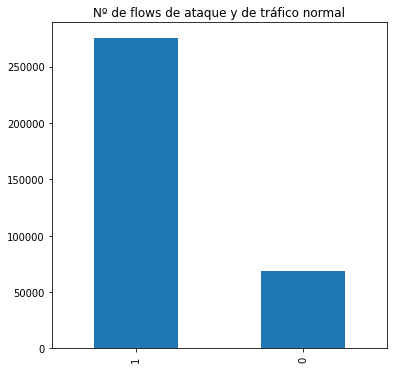

In [10]:
plt.close("all")
fig = plt.figure(figsize=(6,6))
datos.Tipo.value_counts().plot(kind='bar')
plt.title('Nº de flows de ataque y de tráfico normal')

##### Atributo Protocol

Text(0.5, 1.0, 'Nº paquetes por protocolo tráfico de ataque')

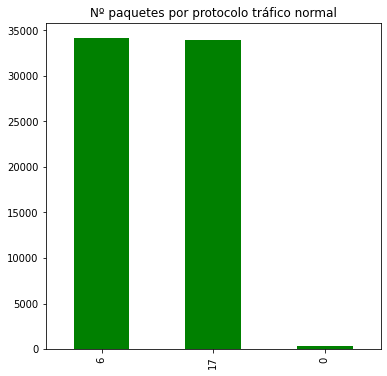

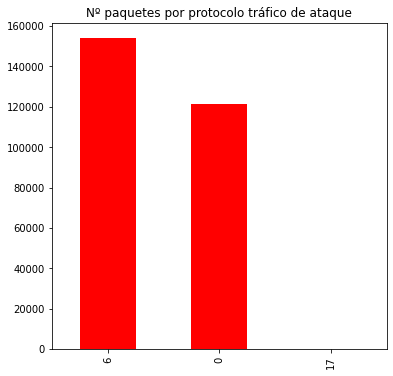

In [11]:
fig = plt.figure(figsize=(6,6))
datos[datos['Tipo']==0].Protocol.value_counts().plot(kind='bar', color='g')
plt.title('Nº paquetes por protocolo tráfico normal')
fig = plt.figure(figsize=(6,6))
datos[datos['Tipo']==1].Protocol.value_counts().plot(kind='bar', color='r')
plt.title('Nº paquetes por protocolo tráfico de ataque')

##### Resto de características

Text(0.5, 1.0, 'Bytes por segundo do flow')

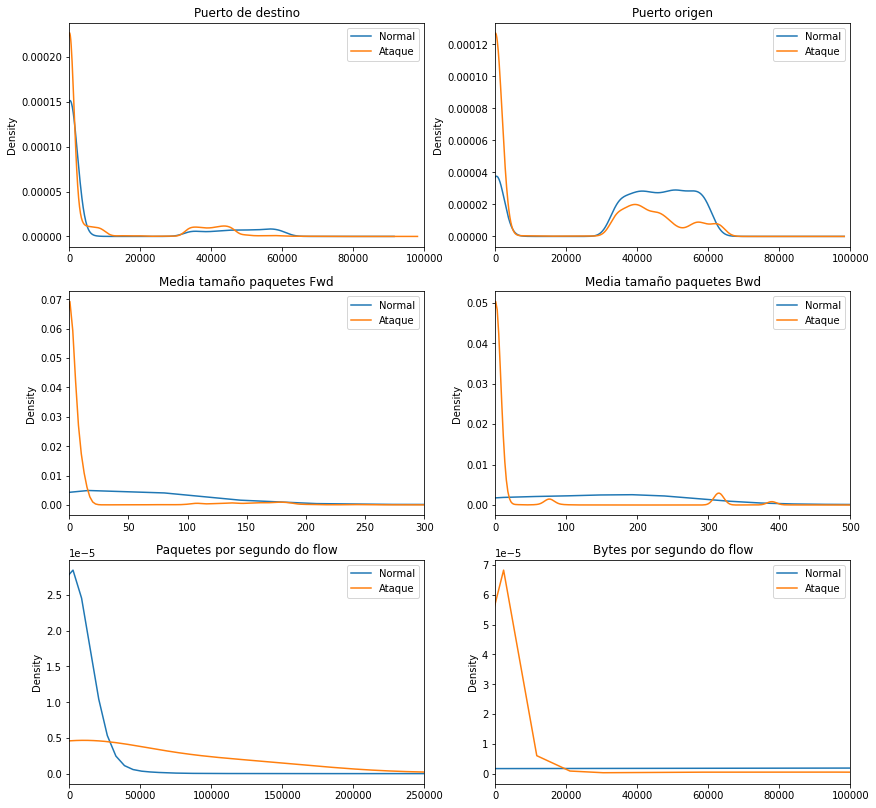

In [12]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((3,2),(0,0))
datos[datos['Tipo']==0]['Dst Port'].plot(kind='kde')
datos[datos['Tipo']==1]['Dst Port'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,100000)
plt.title('Puerto de destino')
plt.subplot2grid((3,2),(0,1))
datos[datos['Tipo']==0]['Src Port'].plot(kind='kde')
datos[datos['Tipo']==1]['Src Port'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,100000)
plt.title('Puerto origen')
plt.subplot2grid((3,2),(1,0))
datos[datos['Tipo']==0]['Fwd Pkt Len Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Fwd Pkt Len Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,300)
plt.title('Media tamaño paquetes Fwd')
plt.subplot2grid((3,2),(1,1))
datos[datos['Tipo']==0]['Bwd Pkt Len Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Bwd Pkt Len Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,500)
plt.title('Media tamaño paquetes Bwd')
plt.subplot2grid((3,2),(2,0))
datos[datos['Tipo']==0]['Flow Pkts/s'].plot(kind='kde')
datos[datos['Tipo']==1]['Flow Pkts/s'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,250000)
plt.title('Paquetes por segundo do flow')
plt.subplot2grid((3,2),(2,1))
datos[datos['Tipo']==0]['Flow Byts/s'].plot(kind='kde')
datos[datos['Tipo']==1]['Flow Byts/s'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,100000)
plt.title('Bytes por segundo do flow')

Text(0.5, 1.0, 'Tamaño medio dos paquetes')

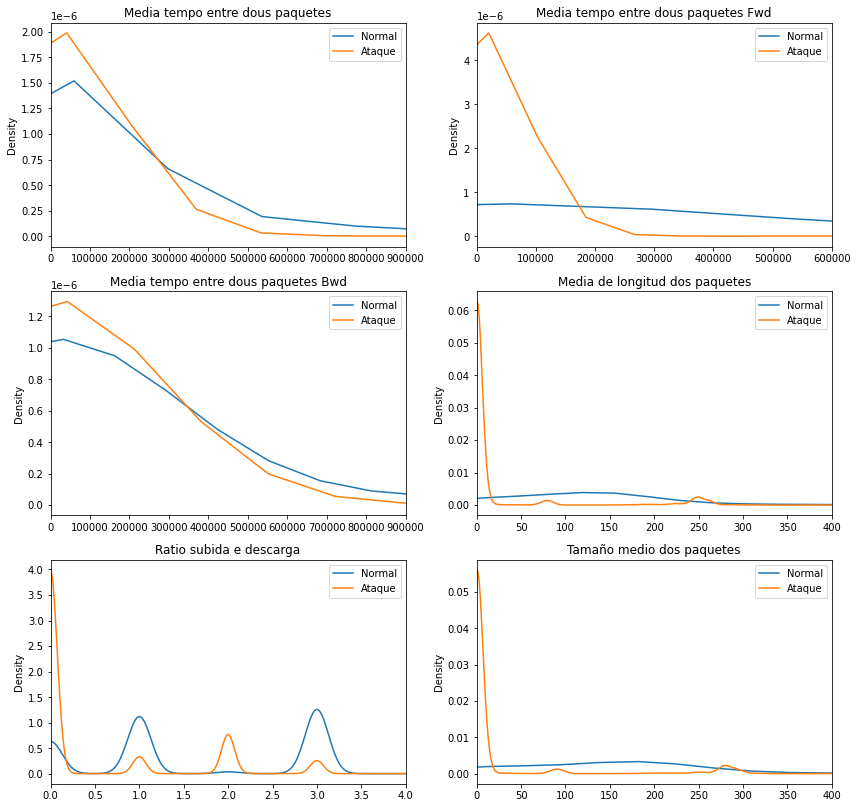

In [13]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((3,2),(0,0))
datos[datos['Tipo']==0]['Flow IAT Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Flow IAT Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,900000)
plt.title('Media tempo entre dous paquetes')
plt.subplot2grid((3,2),(0,1))
datos[datos['Tipo']==0]['Fwd IAT Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Fwd IAT Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,600000)
plt.title('Media tempo entre dous paquetes Fwd')
plt.subplot2grid((3,2),(1,0))
datos[datos['Tipo']==0]['Bwd IAT Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Bwd IAT Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,900000)
plt.title('Media tempo entre dous paquetes Bwd')
plt.subplot2grid((3,2),(1,1))
datos[datos['Tipo']==0]['Pkt Len Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Pkt Len Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,400)
plt.title('Media de longitud dos paquetes')
plt.subplot2grid((3,2),(2,0))
datos[datos['Tipo']==0]['Down/Up Ratio'].plot(kind='kde')
datos[datos['Tipo']==1]['Down/Up Ratio'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,4)
plt.title('Ratio subida e descarga')
plt.subplot2grid((3,2),(2,1))
datos[datos['Tipo']==0]['Pkt Size Avg'].plot(kind='kde')
datos[datos['Tipo']==1]['Pkt Size Avg'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,400)
plt.title('Tamaño medio dos paquetes')

##### Importancia de las características

In [13]:
# rng = np.random.RandomState(1)
# modeloimportancia = RandomForestRegressor(n_estimators=100, random_state=rng)
# modeloimportancia = modeloimportancia.fit(datos,datos['Tipo'])
# importancia = modeloimportancia.feature_importances_
# for i,v in enumerate(importancia):
# 	print('Feature: '+datos.columns.values[i]+' , Score: %.5f' % (v))
# importancia.sort_values(ascending=True, inplace=True)
# importancia.plot.barh(color='green')
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.title("Global Feature Importance - Built-in Method")

### Verificación de los datos

##### Eliminación de atributos que sólo aportan un valor

In [14]:
datos = datos.drop(['Fwd PSH Flags','Fwd URG Flags','CWE Flag Count','ECE Flag Cnt','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg',
                    'Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Init Fwd Win Byts','Fwd Seg Size Min'], axis=1)

##### Eliminación de valores incoherentes

In [15]:
duracionnegativa = datos.index[datos['Flow Duration'] < 0]
datos = datos.drop(duracionnegativa)

### Preparación de los datos

##### Construcción

###### Cambio en el atributo de Ip de origen y destino

In [16]:
datos['Origen 192.168.8'] = np.where(datos["Src IP"].str.startswith('192.168.8.'),1,0)
datos['Origen 192.168.3'] = np.where(datos["Src IP"].str.startswith('192.168.3.'),1,0)
datos['Origen 200.175.2'] = np.where(datos["Src IP"].str.startswith('200.175.2.'),1,0)
datos['Origen 192.168.20'] = np.where(datos["Src IP"].str.startswith('192.168.20.'),1,0)
datos['Origen 172.17.0'] = np.where(datos["Src IP"].str.startswith('172.17.0.'),1,0)
datos['Destino 192.168.8'] = np.where(datos["Dst IP"].str.startswith('192.168.8.'),1,0)
datos['Destino 192.168.3'] = np.where(datos["Dst IP"].str.startswith('192.168.3.'),1,0)
datos['Destino 200.175.2'] = np.where(datos["Dst IP"].str.startswith('200.175.2.'),1,0)
datos['Destino 192.168.20'] = np.where(datos["Dst IP"].str.startswith('192.168.20.'),1,0)
datos['Destino 172.17.0'] = np.where(datos["Dst IP"].str.startswith('172.17.0.'),1,0)

##### Formateo

###### No necesarios tras creación de nuevos atributos

In [17]:
datos = datos.drop(['Flow ID','Src IP','Dst IP','Timestamp','Label'], axis=1)

##### Selección

###### Importancia de los atributos

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.8s finished


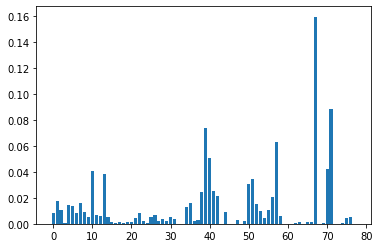

In [18]:
modeloimportancia = RandomForestClassifier(n_estimators=100, bootstrap = True, verbose=2,max_features = 'sqrt', random_state=rng)
modeloimportancia = modeloimportancia.fit(datos,datos['Tipo'])
importancia = modeloimportancia.feature_importances_
for i,v in enumerate(importancia):
	print('Feature: '+datos.columns.values[i]+' , Score: %.5f' % (v))
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

###### Matriz de correlación

<AxesSubplot:>

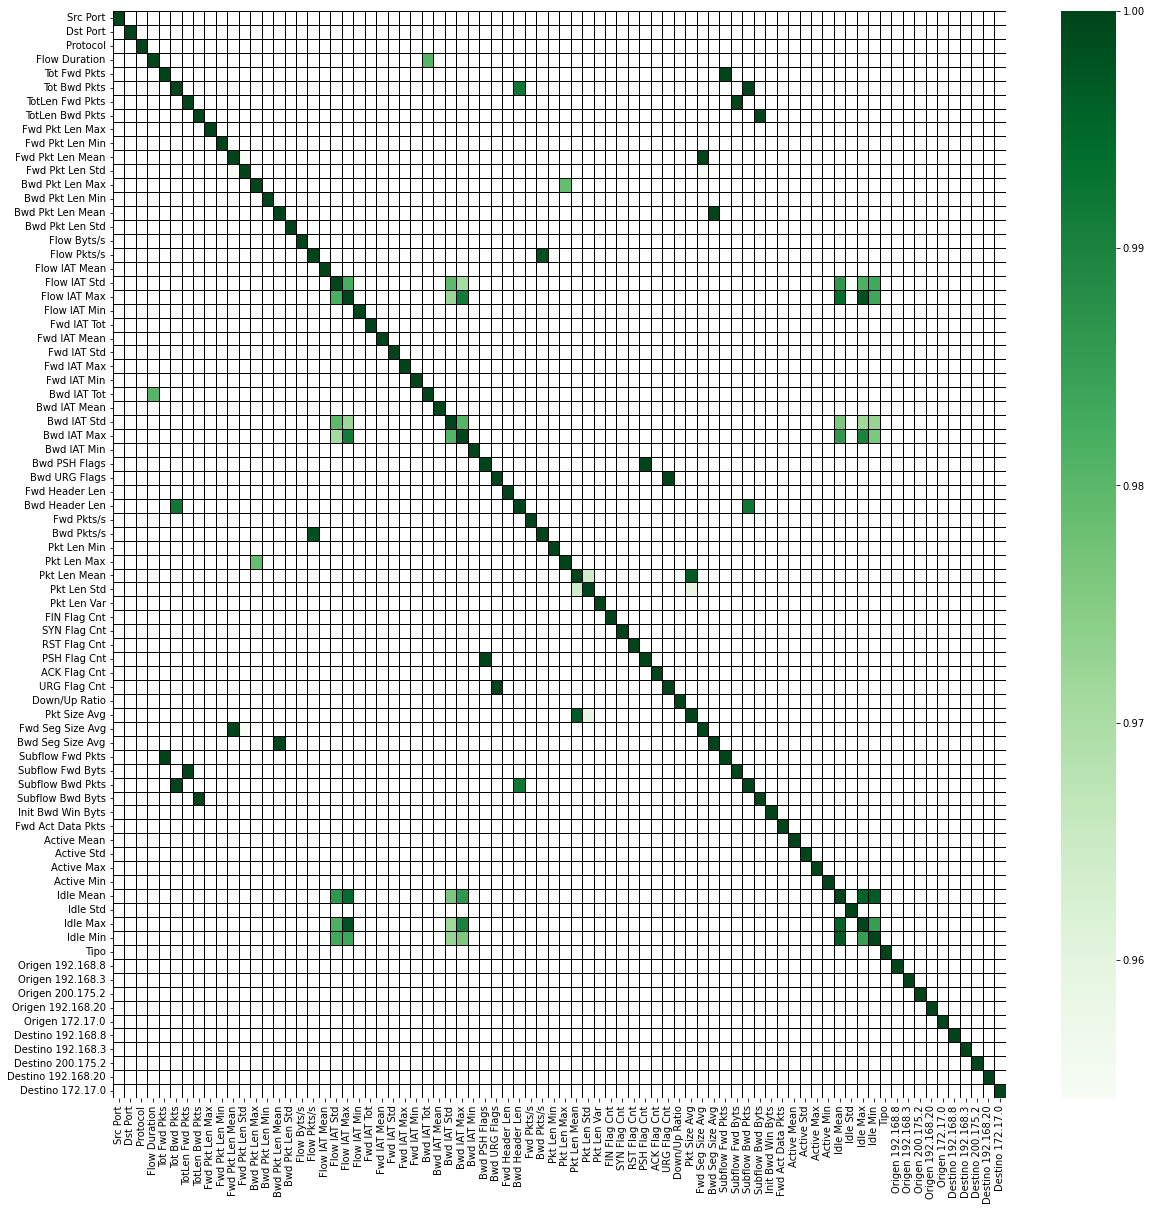

In [19]:
corr = datos.corr()
positiva = corr[corr>=.95]
plt.figure(figsize=(20,20))
sns.heatmap(positiva, cmap="Greens", linewidths=.5, linecolor="black")

<AxesSubplot:>

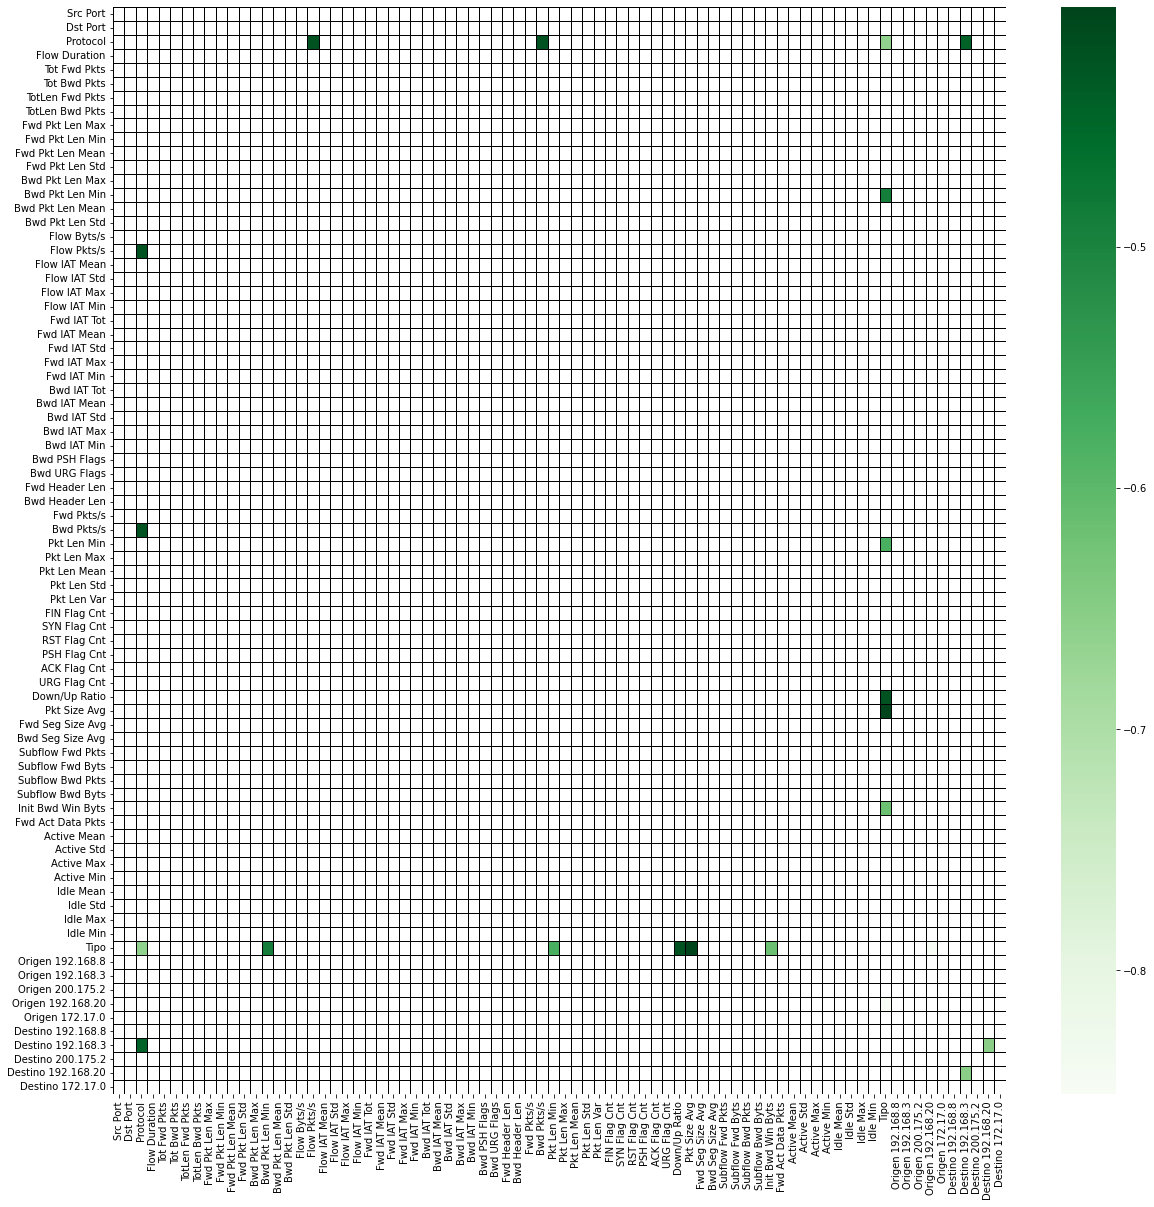

In [20]:
corr = datos.corr()
negativa = corr[corr<=-0.4]
plt.figure(figsize=(20,20))
sns.heatmap(negativa, cmap="Greens", linewidths=.5, linecolor="black")

###### Eliminación de atributos según correlaciones

In [21]:
datos = datos.drop(['Bwd PSH Flags','Subflow Fwd Byts','Subflow Bwd Byts','Subflow Fwd Pkts','Subflow Bwd Pkts',
                    'Fwd Seg Size Avg','Bwd Seg Size Avg','Bwd Pkts/s','Idle Max','Idle Min','Idle Mean','Flow IAT Std',
                    'Flow IAT Max','Bwd Pkt Len Max','Bwd IAT Tot','Bwd URG Flags','Tot Bwd Pkts','Bwd IAT Std','Pkt Len Mean','Pkt Len Std'], axis=1)

<AxesSubplot:>

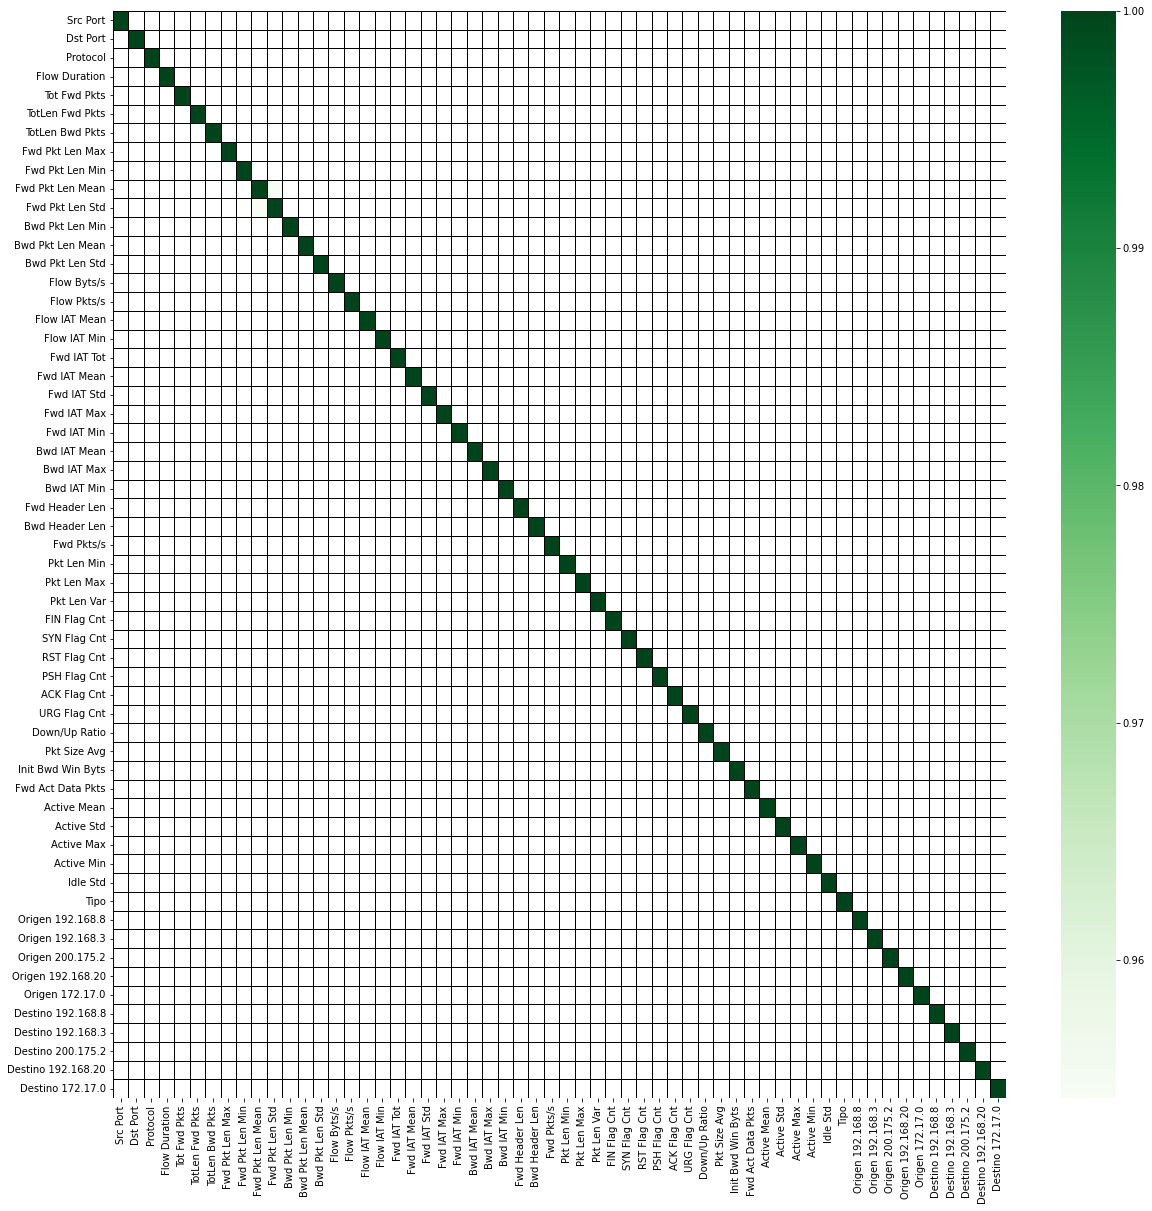

In [22]:
corr = datos.corr()
positiva = corr[corr>=.95]
plt.figure(figsize=(20,20))
sns.heatmap(positiva, cmap="Greens", linewidths=.5, linecolor="black")

##### Limpieza

In [23]:
variable1 = ["Flow Duration", "Tot Fwd Pkts", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Max", "Fwd Pkt Len Min", "Fwd Pkt Len Mean", "Fwd Pkt Len Std", "Bwd Pkt Len Min"]
variable2 = ["Bwd Pkt Len Mean", "Bwd Pkt Len Std", "Flow Byts/s", "Flow Pkts/s", "Flow IAT Mean", "Flow IAT Min", "Fwd IAT Tot", "Fwd IAT Mean", "Fwd IAT Std"]
variable3 = ["Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Mean", "Bwd IAT Max", "Bwd IAT Min", "Fwd Header Len", "Bwd Header Len", "Fwd Pkts/s", "Pkt Len Min"]
variable4 = ["Pkt Len Max", "Pkt Len Var", "FIN Flag Cnt", "SYN Flag Cnt", "RST Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "URG Flag Cnt", "Down/Up Ratio"]
variable5 = ["Pkt Size Avg", "Init Bwd Win Byts", "Fwd Act Data Pkts", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Std"]

modeloisolation = IsolationForest(n_estimators = 100, max_samples ='auto', contamination = 0.001, n_jobs = -1, random_state=rng)
modeloisolation.fit(datos[variable1])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[variable1])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[variable1])
datos['scores'] = score_anomalia
print(datos['anomalias'].loc[datos['anomalias']==-1].shape)
datos = datos.loc[(clasificacion_predicha != -1), :]

modeloisolation = IsolationForest(n_estimators = 100, max_samples ='auto', contamination = 0.001, n_jobs = -1, random_state=rng)
modeloisolation.fit(datos[variable2])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[variable2])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[variable2])
datos['scores'] = score_anomalia
print(datos['anomalias'].loc[datos['anomalias']==-1].shape)
datos = datos.loc[(clasificacion_predicha != -1), :]

modeloisolation = IsolationForest(n_estimators = 100, max_samples ='auto', contamination = 0.001, n_jobs = -1, random_state=rng)
modeloisolation.fit(datos[variable3])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[variable3])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[variable3])
datos['scores'] = score_anomalia
print(datos['anomalias'].loc[datos['anomalias']==-1].shape)
datos = datos.loc[(clasificacion_predicha != -1), :]

modeloisolation = IsolationForest(n_estimators = 100, max_samples ='auto', contamination = 0.001, n_jobs = -1, random_state=rng)
modeloisolation.fit(datos[variable4])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[variable4])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[variable4])
datos['scores'] = score_anomalia
print(datos['anomalias'].loc[datos['anomalias']==-1].shape)
datos = datos.loc[(clasificacion_predicha != -1), :]

modeloisolation = IsolationForest(n_estimators = 100, max_samples ='auto', contamination = 0.001, n_jobs = -1, random_state=rng)
modeloisolation.fit(datos[variable5])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[variable5])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[variable5])
datos['scores'] = score_anomalia
print(datos['anomalias'].loc[datos['anomalias']==-1].shape)
datos = datos.loc[(clasificacion_predicha != -1), :]

c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(341,)


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(316,)


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(344,)


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(343,)


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(330,)


##### RFECV

Optimum number of features: 31


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


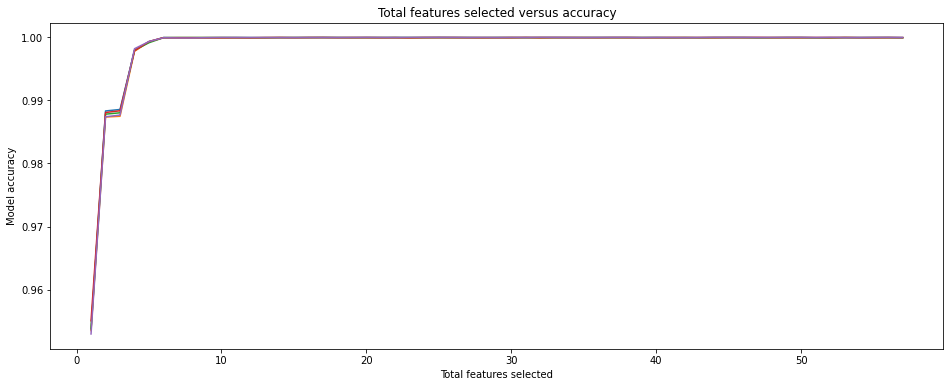

In [24]:
rng = np.random.RandomState(10)
yrfecv = datos['Tipo']
Xrfecv = datos.drop(['Tipo','anomalias','scores'], axis=1)
rfecv = RFECV(estimator=DecisionTreeClassifier(max_depth=None,random_state=rng), step=1, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=rng), scoring='accuracy', n_jobs=-1)
rfecv.fit(Xrfecv,yrfecv)
print("Optimum number of features: %d" % rfecv.n_features_)
plt.figure(figsize=(16,6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [25]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(Xrfecv.shape[1]):
    row = {'feature': Xrfecv.columns.values[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(60)
df_features[df_features['support']==True]

C:\Users\adria\AppData\Local\Temp\ipykernel_2016\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_2016\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_2016\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_2016\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.app

,feature,support,ranking
1,Dst Port,True,1
2,Protocol,True,1
3,Flow Duration,True,1
4,Tot Fwd Pkts,True,1
5,TotLen Fwd Pkts,True,1
6,TotLen Bwd Pkts,True,1
7,Fwd Pkt Len Max,True,1
8,Fwd Pkt Len Min,True,1
10,Fwd Pkt Len Std,True,1
15,Flow Pkts/s,True,1


In [26]:
selected_features = rfecv.get_support(1)
X = Xrfecv[Xrfecv.columns[selected_features]]
dt = X.assign(Tipo=yrfecv)
dt.head(5)


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Std,Flow Pkts/s,Flow IAT Mean,Flow IAT Min,Bwd IAT Mean,Bwd IAT Max,Bwd IAT Min,Fwd Pkts/s,Pkt Len Max,Pkt Len Var,FIN Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Init Bwd Win Byts,Idle Std,Origen 192.168.8,Origen 200.175.2,Origen 192.168.20,Destino 192.168.3,Destino 200.175.2,Destino 192.168.20,Tipo
1,443,6,1605449,107,1071.0,439537.0,517,0,67.496680,159.456949,6295.878431,-102.0,10831.95946,861129.0,1.0,66.648022,27300,7.362897e+06,0,0,0,1,1721.125000,64240,0.0,0,0,1,0,0,0,0
2,53,6,53078,5,66.0,758.0,66,0,29.516097,188.401974,5897.555556,19.0,13240.50000,46258.0,405.0,94.200987,638,3.640749e+04,0,0,0,1,82.400000,64240,0.0,0,0,1,0,0,1,0
3,35108,6,6975,1,0.0,0.0,0,0,0.000000,286.738351,6975.000000,6975.0,0.00000,0.0,0.0,143.369176,0,0.000000e+00,0,1,0,1,0.000000,64239,0.0,0,0,1,0,0,1,0
4,443,6,190141,13,780.0,11085.0,427,0,130.042942,152.518394,6790.750000,-54.0,12676.06667,38521.0,1.0,68.370315,2596,4.378359e+05,0,0,0,1,409.137931,64240,0.0,0,0,1,0,0,0,0
5,443,6,4781,2,31.0,0.0,31,0,21.920310,627.483790,2390.500000,1381.0,0.00000,0.0,0.0,418.322527,31,2.402500e+02,0,1,0,0,10.333333,53440,0.0,0,0,1,0,0,0,0


In [27]:
dt.shape

(342191, 32)

##### Importación a csv

In [30]:
dt.to_csv("dataset_final.csv",encoding='utf-8', index= False)